## Figuring Our Which Customers May Leave - Churn Analysis

### About our Dataset

In [1]:
# Load our data
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [5]:
# Summarize our dataset 
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
data['Churn'].value_counts(sort=True)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Exploratory Data Analysis

In [7]:
# Create a new dataset called summary so that we can summarize our churn data
# Crosstab - Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.


summary = pd.concat([pd.crosstab(data[x], data.Churn) for x in data.columns[:-1]], keys=data.columns[:-1])
summary

Churn                    No  Yes
customerID   0002-ORFBO   1    0
             0003-MKNFE   1    0
             0004-TLHLJ   0    1
             0011-IGKFF   0    1
             0013-EXCHZ   0    1
...                      ..  ...
TotalCharges 997.75       1    0
             998.1        1    0
             999.45       0    1
             999.8        1    0
             999.9        1    0

[15275 rows x 2 columns]

### Lets Make A Percentage Column

In [8]:
summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary

Churn                    No  Yes  Churn_Percentage
customerID   0002-ORFBO   1    0               0.0
             0003-MKNFE   1    0               0.0
             0004-TLHLJ   0    1               1.0
             0011-IGKFF   0    1               1.0
             0013-EXCHZ   0    1               1.0
...                      ..  ...               ...
TotalCharges 997.75       1    0               0.0
             998.1        1    0               0.0
             999.45       0    1               1.0
             999.8        1    0               0.0
             999.9        1    0               0.0

[15275 rows x 3 columns]

### Visualisation and EDA

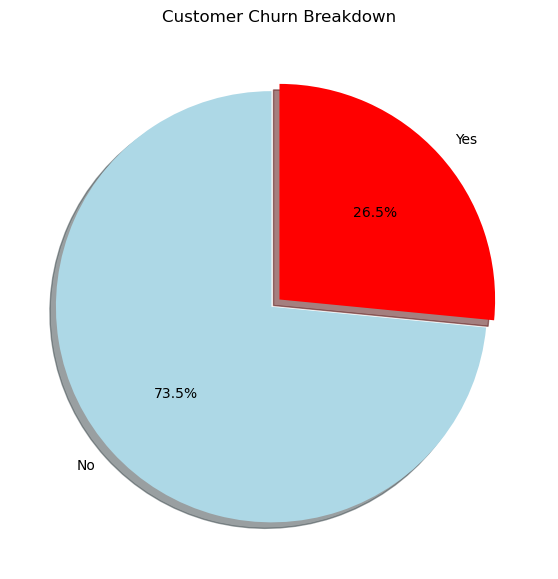

In [9]:
import matplotlib.pyplot as plt # Used to plot the Graph
import seaborn as sns # Used to make the Graph look more interactive
from pylab import rcParams # 

#Data to plot
labels = data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice

rcParams['figure.figsize'] = 7,7
#Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


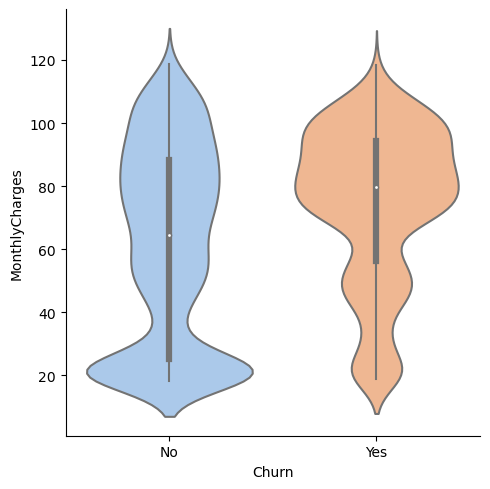

In [10]:
# Create a Volin Plot showing how monthy charges relate to Churn
# We an see that Churned customers tend to be higher paying customers

g=sns.catplot(x="Churn", y="MonthlyCharges", data=data, kind='violin', palette="pastel")

## Preparing data for machine learning


In [11]:
# Checking for empty fields, Note, " " is not Null but a spaced character
len(data[data['TotalCharges'] == " "])

11

In [12]:
## Drop missing data
data = data[data['TotalCharges'] != " "]

In [13]:
# Rechecking the empty field
len(data[data['TotalCharges'] == " "])

0

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id column
id_col = ['Customer_id']

#target column

target_col =['Churn']

#catogorical Columns
cat_cols = data.nunique()[data.nunique() <6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

# Numerical Columns
num_cols = [x for x in data.columns if x not in cat_cols + target_col + id_col]

#Binary Columns with 2 values
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns with more than 2 values 
multi_cols= [i for i in cat_cols if i not in bin_cols]

#Label encoding binary columns
le = LabelEncoder()
for i in bin_cols:
    data[i]=le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data=data, columns = multi_cols)
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6056\2643246443.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=le.fit_transform(data[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6056\2643246443.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=le.fit_transform(data[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6056\2643246443.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [15]:
len(data.columns)

42

In [16]:
num_cols

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Automatically select numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Scale only numeric columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled, columns=num_cols)

# Backup the original DataFrame
df_telcom_og = data.copy()

# Drop original numeric columns and merge scaled columns
data = data.drop(columns=num_cols, axis=1)
data = data.merge(scaled_df, left_index=True, right_index=True, how='left')

# Display the result
print(data.head())


   customerID  gender  Partner  Dependents  PhoneService  PaperlessBilling  \
0  7590-VHVEG       0        1           0             0                 1   
1  5575-GNVDE       1        0           0             1                 0   
2  3668-QPYBK       1        0           0             1                 1   
3  7795-CFOCW       1        0           0             0                 0   
4  9237-HQITU       0        0           0             1                 1   

  TotalCharges  Churn  MultipleLines_No  MultipleLines_No phone service  ...  \
0        29.85      0             False                            True  ...   
1       1889.5      0              True                           False  ...   
2       108.15      1              True                           False  ...   
3      1840.75      0             False                            True  ...   
4       151.65      1              True                           False  ...   

   Contract_Month-to-month  Contract_One year  Con

In [18]:
data.drop(['customerID'], axis=1, inplace=True)
data.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,29.85,0,False,True,False,...,True,False,False,False,False,True,False,-0.440327,-1.280248,-1.161694
1,1,0,0,1,0,1889.5,0,True,False,False,...,False,True,False,False,False,False,True,-0.440327,0.064303,-0.260878
2,1,0,0,1,1,108.15,1,True,False,False,...,True,False,False,False,False,False,True,-0.440327,-1.239504,-0.363923
3,1,0,0,0,0,1840.75,0,False,True,False,...,False,True,False,True,False,False,False,-0.440327,0.512486,-0.747850
4,0,0,0,1,1,151.65,1,True,False,False,...,True,False,False,False,False,True,False,-0.440327,-1.239504,0.196178


In [19]:
data[data.isnull().any(axis=1)]

,gender,Partner,Dependents,PhoneService,PaperlessBilling,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges
7032,1,0,0,1,1,75.75,1,False,False,True,...,True,False,False,False,False,True,False,NaN,NaN,NaN
7033,1,0,0,1,1,2625.25,0,True,False,False,...,True,False,False,False,True,False,False,NaN,NaN,NaN
7034,0,0,0,1,1,6886.25,1,False,False,True,...,True,False,False,False,True,False,False,NaN,NaN,NaN
7035,1,0,0,1,1,1495.1,0,True,False,False,...,True,False,False,True,False,False,False,NaN,NaN,NaN
7036,0,0,0,0,0,743.3,0,False,True,False,...,False,True,False,False,False,True,False,NaN,NaN,NaN
7037,0,0,0,1,1,1419.4,0,True,False,False,...,False,False,True,True,False,False,False,NaN,NaN,NaN
7038,1,1,1,1,1,1990.5,0,False,False,True,...,False,True,False,False,False,False,True,NaN,NaN,NaN
7039,0,1,1,1,1,7362.9,0,False,False,True,...,False,True,False,False,True,False,False,NaN,NaN,NaN
7040,0,1,1,0,1,346.45,0,False,True,False,...,True,False,False,False,False,True,False,NaN,NaN,NaN
7041,1,1,0,1,1,306.6,1,False,False,True,...,True,False,False,False,False,False,True,NaN,NaN,NaN


In [20]:
data = data.dropna()

In [21]:
data[data.isnull().any(axis=1)]

,gender,Partner,Dependents,PhoneService,PaperlessBilling,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges


## Modeling

In [22]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = data.drop(['Churn'], axis=1).values

# We assigned those label values to our Y dataset
y = data['Churn'].values

In [23]:
#Spliting the train test ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
type(X_train)

numpy.ndarray

In [25]:
df_train=pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,0,1,1,69.25,True,False,False,False,...,True,False,False,False,False,True,False,-0.440327,1.612573,-1.509057
1,0,1,1,1,1,5959.3,False,False,True,True,...,False,False,True,False,True,False,False,-0.440327,0.716206,-0.842586
2,0,0,0,1,1,3810.55,False,False,True,False,...,True,False,False,False,False,True,False,-0.440327,0.75695,1.050458
3,1,1,1,1,1,3091.75,True,False,False,False,...,True,False,False,False,False,True,False,-0.440327,1.042158,-1.517367
4,0,1,1,1,1,4976.15,False,False,True,False,...,False,True,False,False,True,False,False,-0.440327,-1.280248,0.856001


In [26]:
print(len(data.columns))
data.columns

41


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_El

In [27]:
data.head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,29.85,0,False,True,False,...,True,False,False,False,False,True,False,-0.440327,-1.280248,-1.161694
1,1,0,0,1,0,1889.5,0,True,False,False,...,False,True,False,False,False,False,True,-0.440327,0.064303,-0.260878
2,1,0,0,1,1,108.15,1,True,False,False,...,True,False,False,False,False,False,True,-0.440327,-1.239504,-0.363923
3,1,0,0,0,0,1840.75,0,False,True,False,...,False,True,False,True,False,False,False,-0.440327,0.512486,-0.747850
4,0,0,0,1,1,151.65,1,True,False,False,...,True,False,False,False,False,True,False,-0.440327,-1.239504,0.196178


## Fit Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy = 0.8025628856193641
[[1395  165]
 [ 251  296]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.64      0.54      0.59       547

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.80      2107



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Let's see what features mattered most i.e. Feature Importance
# We sort on the co-efficients with the largest weights as those impact the resulting output the most

coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.005446435676156124, 0.00944554599637696, 0.159476151324487, 0.16915667812589158, 0.375075516913414, 0.0003238710370291609, 0.28153304783708555, 0.16677031565117434, 0.11237636971821915, 0.5672504034446681, 0.4941263925040879, 0.26280298280953923, 0.23501278301337922, 0.26280298280953923, 0.3081367939418099, 0.025036112931672187, 0.26280298280953923, 0.09816012390572273, 0.04648959769676805, 0.26280298280953923, 0.026634413274984926, 0.17080109497769644, 0.26280298280953923, 0.24392510595160682, 0.1474488930133768, 0.26280298280953923, 0.0743248820524016, 0.22251678693442128, 0.26280298280953923, 0.14939277594674946, 0.5890262585489211, 0.28007067818291004, 0.6448825741050785, 0.1953814795731983, 0.2890669561307362, 0.2193893233729928, 0.07086788137227942, 0.0239289625297234, 0.008028387939618464, 0.037167749300517035]


In [34]:
# Finding and deleting the label column
cols = list(data.columns)
cols.index('Churn')

6

In [36]:
del cols[6]
cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'TotalCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges']

In [38]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(cols)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

PaymentMethod_Bank transfer (automatic)
Contract_One year
InternetService_Fiber optic
InternetService_No
PaperlessBilling
OnlineBackup_No
PaymentMethod_Electronic check
MultipleLines_No phone service
Contract_Two year
OnlineSecurity_No
OnlineSecurity_Yes
OnlineBackup_Yes
DeviceProtection_Yes
TechSupport_Yes
StreamingTV_Yes
StreamingMovies_Yes
StreamingTV_No
OnlineSecurity_No internet service
StreamingMovies_No internet service
PaymentMethod_Mailed check
PaymentMethod_Credit card (automatic)
TechSupport_No internet service
PhoneService
MultipleLines_Yes
Dependents
Contract_Month-to-month
StreamingTV_No internet service
InternetService_DSL
DeviceProtection_No
StreamingMovies_No
SeniorCitizen
DeviceProtection_No internet service
TechSupport_No
OnlineBackup_No internet service
tenure
Partner
MonthlyCharges
gender
TotalCharges


## Trying Random Forest 

In [39]:
# Let's try Random Forests now to see if our resutls get better
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7963929757949691
[[1416  144]
 [ 285  262]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.48      0.55       547

    accuracy                           0.80      2107
   macro avg       0.74      0.69      0.71      2107
weighted avg       0.78      0.80      0.79      2107



In [40]:
## In random forest the accuracy is less then the Logistic regressing 

In [42]:
predictions = loaded_model_rf.predict(X_test)

## Saving and Loading of Models

In [73]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(model_rf, f)

# load
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

## Try Deep Learning

In [66]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [67]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841 (3.29 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ensure data is numerical and scaled
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# Convert labels to floats (or one-hot encode for categorical)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Train the model
batch_size = 64
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7350 - loss: 0.6432 - val_accuracy: 0.7803 - val_loss: 0.4878
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4574 - val_accuracy: 0.7883 - val_loss: 0.4429
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.4325 - val_accuracy: 0.7931 - val_loss: 0.4346
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4342 - val_accuracy: 0.7959 - val_loss: 0.4307
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4323 - val_accuracy: 0.7926 - val_loss: 0.4285
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 0.4206 - val_accuracy: 0.7935 - val_loss: 0.4259
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.4119 - val_accuracy: 0.7954 - val_loss: 0.4242
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7920 - loss: 0.4251 - val_accuracy: 0.7950 - val_loss:

In [71]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1397  163]
 [ 251  296]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1560
         1.0       0.64      0.54      0.59       547

    accuracy                           0.80      2107
   macro avg       0.75      0.72      0.73      2107
weighted avg       0.80      0.80      0.80      2107



## Saving and Loading our Deep Learning models

In [74]:
model.save("simple_cnn_25_epochs.h5")
print("Model Saved")

Model Saved


In [75]:
# Load our model
from tensorflow.keras.models import load_model

classifier = load_model('simple_cnn_25_epochs.h5')

## Let's try a Deeper Model and Learn to use Checkpoints and Early stopping

In [56]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create our checkpoint so that we save each model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2000)                │          82,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,584,001 (9.86 MB)

 Trainable params: 2,584,001 (9.86 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Define our earling stoppping criteria
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 2,
                          verbose = 1,
                          restore_best_weights = True)
                          
# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [80]:
batch_size = 85
epochs = 20

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs=epochs,
                    callbacks=callbacks,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7701 - loss: 11.6846
Epoch 1: val_loss improved from inf to 0.80498, saving model to deep_model_checkpoint.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.7701 - loss: 11.5920 - val_accuracy: 0.7883 - val_loss: 0.8050
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7918 - loss: 0.6405
Epoch 2: val_loss improved from 0.80498 to 0.49532, saving model to deep_model_checkpoint.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.7918 - loss: 0.6392 - val_accuracy: 0.7902 - val_loss: 0.4953
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7989 - loss: 0.4849
Epoch 3: val_loss improved from 0.49532 to 0.47793, saving model to deep_model_checkpoint.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.7988 - loss: 0.4850 - val_accuracy: 0.8011 - val_loss: 0.4779
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8020 - loss: 0.4655
Epoch 4: val_loss improved